# Neural Net "from scratch" with N layers and a multinomial classification output
# *Réseau de neurones à N couches avec classification mulitnomiale*
### sources : 
https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

http://kkms.org/index.php/kjm/article/view/1275/673

https://stats.stackexchange.com/questions/378274/how-to-construct-a-cross-entropy-loss-for-general-regression-targets

https://physique.cmaisonneuve.qc.ca/svezina/mat/note_mat/MAT_Chap%206.2.pdf

<img src="nb_images/Nlayers_multi_sig.png" alt="N layer neural net multiclass output" width=700 height=500> </img>

## The input data is given by (in vectorial notation) :
$\Large
X = 
\begin{bmatrix}
x_1^{1} & x_1^{2} & ... & x_1^{m} \\
x_2^{1} & x_2^{2} & ... & x_2^{m}
\end{bmatrix}
$
&emsp;
$\Large X \in \mathbb{R}^{n^{[0]} \times m}$
&emsp;
$;$ &emsp; &emsp;
$\Large
y = 
\begin{bmatrix}
y_1^{1} & y_1^{2} & ... & y_1^{m} \\
y_2^{1} & y_2^{2} & ... & y_2^{m} \\
y_3^{1} & y_3^{2} & ... & y_3^{m}
\end{bmatrix}
$
&emsp;
$\Large y \in \mathbb{R}^{n^{[N]} \times m}$
<br></br>


## Z and W matrices for each layer
### *Les matrices Z et W pour chaque couche* :<br> </br>
$\Large 
\left\{
    \begin{array}{ll}
        Z^{[1]} = W^{[1]}.X + b^{[1]} & \text{: \, first layer} \\
        \\
        Z^{[2]} = W^{[2]}.A^{[1]} + b^{[2]} & \text{: \, second layer} \\
        \\
        ... & ...\\ 
        \\
        Z^{[N]} = W^{[N]}.A^{[N-1]} + b^{[N]} & \text{: \, N-th layer} \\
    \end{array}
\right.
$

&emsp; $\Large with$ &emsp; $\Large A^{[layer]} = \dfrac{1}{1+e^{-Z^{[layer]}}}$  &emsp; $\Large \text{, sigmoïd function for the hidden layers, }$ <br></br>

&emsp; $\Large and$ &emsp; $\Large A^{[N]} = \dfrac{e^{z_i}}{\sum_{k=1}^{k} e^{z_k}} $ &emsp; $\Large \text{, softmax function for the last layer}$


## The **dimensions** for these matrices
### *Les **dimensions** de ces matrices :*

### $ Z^{[1]},A^{[1]} \in \mathbb{R}^{n^{[1]} \times m}$ &emsp;&emsp;;&emsp;&emsp;$ Z^{[2]},A^{[2]} \in \mathbb{R}^{n^{[2]} \times m}$ &emsp;  ... &emsp;$ Z^{[N]},A^{[N]} \in \mathbb{R}^{n^{[N]} \times m}$


### $ b^{[1]} \in \mathbb{R}^{n^{[1]} \times 1} \ \ \ \ ; \ \ \ \ b^{[2]} \in \mathbb{R}^{n^{[2]} \times 1}  \ \ \ \ ... \ \ \ \ b^{[N]} \in \mathbb{R}^{n^{[N]} \times 1}$
### $ W^{[1]} \in \mathbb{R}^{n^{[1]} \times n^{[0]}} \ \ \ \ ; \ \ \ \ W^{[2]} \in \mathbb{R}^{n^{[2]} \times n^{[1]}} ... \ \ \ \ W^{[N]} \in \mathbb{R}^{n^{[N]} \times n^{[N-1]}} $ 

## Cross-entropy Loss function to minimize
### *Fonction d'entropie croisée à minimiser :* 

&nbsp; &nbsp; &nbsp; $\Large L(y,\hat{y}) = - \sum_{i} y_i log(\hat{y_i}) $

$\text{N-th layer} \ \ \ \, \Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[N]}} = \frac{1}{m} dz_N . A^{[N-1]^{T}} \\
        \\
        \frac{\partial L}{\partial b^{[N]}} = \frac{1}{m} \sum_{_{axe1}} dz_N
    \end{array}
\right.
$
&emsp; $\Large with \ \ \ $ &ensp; $\Large dz_N = (A^{[N]}-y) $

$\text{(N-1)th layer}\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[N-1]}} = \frac{1}{m} dz_{N-1} . A^{[N-2]^{T}} \\
        \\
        \frac{\partial L}{\partial b^{[N-1]}} = \frac{1}{m} \sum_{_{axe1}} dz_{N-1}
    \end{array}
\right.
$
&emsp; $\Large with \ \ \ $ &ensp; $\Large dz_{N-1} = W^{[N]^{T}}.dz_N \times A^{[N-1]}(1 - A^{[N-1]}) $

 $ 
.\\
.\\
.\\
$

$\text{1st layer} \ \ \ \ \ \ \ \ \Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} dz_1 . X^{T} \\
        \\
        \frac{\partial L}{\partial b^{[1]}} = \frac{1}{m} \sum_{_{axe1}} dz_1
    \end{array}
\right.
$
&emsp; $\Large with \, \ \ $ &ensp; $\Large dz_1 = W^{[2]^{T}}.dz_2 \times A^{[1]}(1 - A^{[1]}) $

### To understand how softmax derivative is calculated : 
https://rinterested.github.io/statistics/softmax.html

<img src="./nb_images/softmax_img.png" alt="2 layer neural net image" width=700 height=375> </img>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


## Let's try with a simple random 3-blobs case 
### *Cas d'une classification de 3 nuages de points random* : 

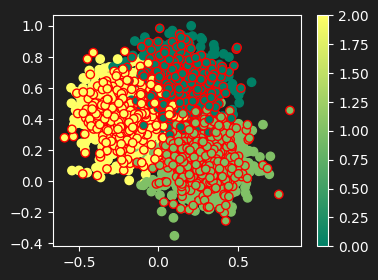

In [24]:
n_output_features = 3
X, y = make_blobs(n_samples=3000, n_features=2, centers=n_output_features, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalisation des données:
X_train_max = X_train.max()
X_train = X_train / X_train_max
X_test = X_test / X_train_max #ici on divise bien par la valeur max du train

X_train = X_train.T 
X_test = X_test.T 

# encodage des sorties (équivalent one hot encoder)
y_train_encoded = np.eye(n_output_features)[y_train].T
y_test_encoded = np.eye(n_output_features)[y_test].T


plt.figure(figsize=(4,3))
plt.scatter(X_train[0,:],X_train[1,:],c=y_train, cmap='summer')
plt.scatter(X_test[0,:],X_test[1,:],c=y_test, cmap='summer', edgecolors='red')
plt.colorbar()
plt.show()

## the y output array must be one-hot encoded so it takes the shape : &ensp; $ n^{[N]} \times m $
### Il faut encoder les sorties y pour que le vecteur aie la taille : &ensp; $ n^{[N]} \times m $


0 &rarr; $\large \begin{bmatrix}1\\0\\0\end{bmatrix}$ ;
1 &rarr; $\large \begin{bmatrix}0\\1\\0\end{bmatrix}$ et 
2 &rarr; $\large \begin{bmatrix}0\\0\\1\end{bmatrix}$


In [25]:
y_train[0:5]

array([0, 0, 2, 2, 0])

In [26]:
y_train_encoded[:,0:5]

array([[1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.]])

In [27]:
def initialisation(first_layer, hidden_layers: list, last_layer):

    np.random.seed(1)
    
    parameters = {}
    
    total_Nlayers = len(hidden_layers) + 2
    
    parameters["W1"] = np.random.randn(hidden_layers[0],first_layer)
    parameters["b1"] = np.random.randn(hidden_layers[0],1)
    
    parameters[f"W{total_Nlayers-1}"] = np.random.randn(last_layer,hidden_layers[-1])
    parameters[f"b{total_Nlayers-1}"] = np.random.randn(last_layer,1)
    
    for i in range(1,len(hidden_layers)):
        parameters[f"W{i+1}"] = np.random.randn(hidden_layers[i],hidden_layers[i-1])
        parameters[f"b{i+1}"] = np.random.randn(hidden_layers[i],1)
   
    return dict(sorted(parameters.items()))

In [28]:
parameters = initialisation(2,[8,8],3)

In [29]:
parameters

{'W1': array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ],
        [ 1.74481176, -0.7612069 ],
        [ 0.3190391 , -0.24937038],
        [ 1.46210794, -2.06014071],
        [-0.3224172 , -0.38405435],
        [ 1.13376944, -1.09989127]]),
 'W2': array([[-0.35224985, -1.1425182 , -0.34934272, -0.20889423,  0.58662319,
          0.83898341,  0.93110208,  0.28558733],
        [ 0.88514116, -0.75439794,  1.25286816,  0.51292982, -0.29809284,
          0.48851815, -0.07557171,  1.13162939],
        [ 1.51981682,  2.18557541, -1.39649634, -1.44411381, -0.50446586,
          0.16003707,  0.87616892,  0.31563495],
        [-2.02220122, -0.30620401,  0.82797464,  0.23009474,  0.76201118,
         -0.22232814, -0.20075807,  0.18656139],
        [ 0.41005165,  0.19829972,  0.11900865, -0.67066229,  0.37756379,
          0.12182127,  1.12948391,  1.19891788],
        [ 0.18515642, -0.37528495, -0.63873041,  0.42349435,  0.07734007,
         

In [30]:
for k, v in parameters.items():
    print(f"{k} shape : {v.shape}")

W1 shape : (8, 2)
W2 shape : (8, 8)
W3 shape : (3, 8)
b1 shape : (8, 1)
b2 shape : (8, 1)
b3 shape : (3, 1)


In [31]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def softmax(Z):
    Z_exp = np.exp(Z)
    Z_sum = np.sum(Z_exp, axis=0, keepdims=True)
    A = Z_exp/Z_sum
    return A

In [32]:
# we rename the "model" function to "forward propagation"
def forward_propagation(X, parameters):

    Z1 = parameters["W1"].dot(X) + parameters["b1"]
    A1 = sigmoid(Z1)
    activations = {"A1" : A1}
    
    for i in range(2,int(len(parameters)/2)+1) :
        Z = parameters[f"W{i}"].dot(activations[f"A{i-1}"]) + parameters[f"b{i}"]
        if i != int(len(parameters)/2):
            activations[f"A{i}"] = sigmoid(Z)
        else:
            activations[f"A{i}"] = softmax(Z)

    return activations

In [33]:
activations = forward_propagation(X_train, parameters)

### **Loss function** : cross-entropy

$ \large L(y,\hat{y}) = - \sum_{i} y_i log(\hat{y_i}) $

In [34]:
def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred))

def loss_derivative(y_true, y_pred):
    return y_pred - y_true

In [35]:
f' X_train shape : {X_train.shape} ; y_train shape : {y_train.shape}'


' X_train shape : (2, 2100) ; y_train shape : (2100,)'

In [36]:
f' X_train shape : {X_train.shape} ; y_train_encoded shape : {y_train_encoded.shape}'

' X_train shape : (2, 2100) ; y_train_encoded shape : (3, 2100)'

### **Backward propagation** 

In [37]:
def back_propagation(X, y, activations, parameters):
    
    m = y.shape[1]
    
    dz = {}
    gradients = {}
    last_activation = list(activations.keys())[-1]
    
    #dernière couche
    dz[f"dz{int(last_activation[-1])}"] = activations[last_activation] - y
    gradients[f"dW{int(last_activation[-1])}"] = (1/m) * dz[f"dz{int(last_activation[-1])}"].dot(activations[f"A{int(last_activation[-1])-1}"].T)
    gradients[f"db{int(last_activation[-1])}"] = (1/m) * np.sum(dz[f"dz{int(last_activation[-1])}"], axis=1, keepdims=True)
    
    #couches intermédiaires
    for i in range(len(activations)-1,1,-1):
        
        dz[f"dz{i}"] = (parameters[f"W{i+1}"].T).dot(dz[f"dz{i+1}"]) * activations[f"A{i}"]*(1-activations[f"A{i}"])
        gradients[f"dW{i}"] = (1/m) * dz[f"dz{i}"].dot(activations[f"A{i-1}"].T)
        gradients[f"db{i}"] = (1/m) * np.sum(dz[f"dz{i}"], axis=1, keepdims=True)
    
    #première couche
    dz["dz1"] = (parameters["W2"].T).dot(dz["dz2"]) * activations["A1"]*(1-activations["A1"])
    gradients["dW1"] = (1/m) * dz["dz1"].dot(X.T)
    gradients["db1"] = (1/m) * np.sum(dz["dz1"], axis=1, keepdims=True)

    return dict(sorted(gradients.items()))

In [38]:
y_train_encoded.shape

(3, 2100)

In [39]:
gradients = back_propagation(X_train,y_train_encoded,activations,parameters)

In [40]:
y_train_encoded.shape

(3, 2100)

In [41]:
test = (1,5,6)

test

(1, 5, 6)

### Gradient Descent : the Neural Net function

In [42]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train_encoded, X_test, y_test_encoded, hidden_layers:list, learning_rate=0.1, n_epochs=100, plot_scores = False):
    
    first_layer = X_train.shape[0]
    last_layer = y_train_encoded.shape[0]
    
    parameters = initialisation(first_layer, hidden_layers, last_layer)
    
    test_cost_hist = []
    train_cost_hist = []
    train_accuracy = []
    test_accuracy = []
    
    for i in tqdm(range(n_epochs)):
        
        activations = forward_propagation(X_train, parameters)
        
        #calcul des gradients:
        gradients = back_propagation(X_train, y_train_encoded, activations, parameters)
        
        #update des gradients:
        for p,g in zip(parameters.keys(), gradients.keys()):
            parameters[p] -= learning_rate * gradients[g]
        
        # Train
        last_activation = list(activations.keys())[-1]
        final_activation_train = activations[last_activation]
        train_output_pred = final_activation_train.argmax(axis=0) #renvoie un vecteur (1 x m)
        train_accuracy.append((train_output_pred == y_train_encoded.argmax(axis=0)).mean())
        train_cost = loss(y_train_encoded, final_activation_train)
        train_cost_hist.append(train_cost)
        
        # Test
        #y_pred = predict(X_test, parametres)
        final_activation_test = forward_propagation(X_test, parameters)[last_activation]
        test_output_pred = final_activation_test.argmax(axis=0)
        test_accuracy.append((test_output_pred == y_test_encoded.argmax(axis=0)).mean())
        test_cost = loss(y_test_encoded, final_activation_test)
        test_cost_hist.append(test_cost)
        
    scores = {
        "loss_train" : train_cost_hist,
        "loss_test" : test_cost_hist,
        "accuracy_train" : train_accuracy,
        "accuracy_test" : test_accuracy,
    }
            
    if plot_scores == True:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(range(len(train_cost_hist)),train_cost_hist, label="Train loss function")
        plt.plot(range(len(test_cost_hist)),test_cost_hist, label="Test loss function")
        plt.title("Loss function")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(range(len(train_accuracy)),train_accuracy, label="Train accuracy")
        plt.plot(range(len(test_accuracy)),test_accuracy, label="Test accuracy")
        plt.title("Accuracy")
        plt.legend()
        plt.show()
    
    return parameters, scores

100%|██████████| 2000/2000 [00:05<00:00, 384.18it/s]


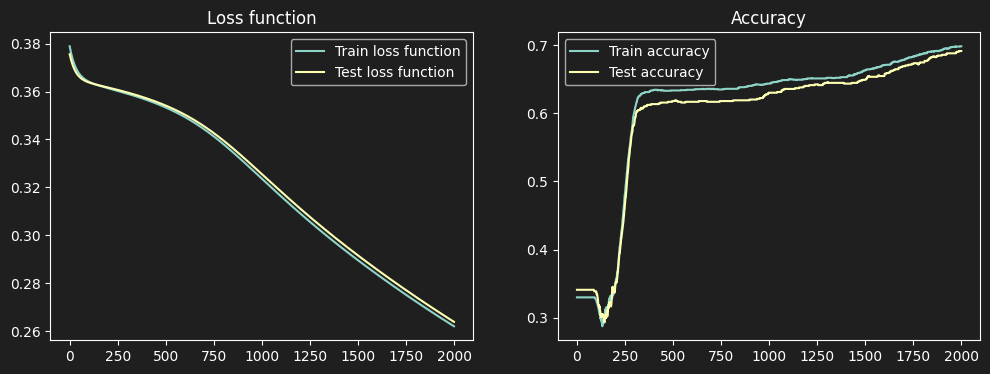

In [44]:
parameters_f, scores = neural_network(X_train, y_train_encoded, X_test, y_test_encoded, [32,16,8] ,learning_rate=0.01,n_epochs=2000, plot_scores=True)

In [45]:
scores["accuracy_train"][-1]

0.6980952380952381

## Let's plot the decision border indirectly by using the neural net on a meshgrid of points. Predicted values for these meshgrid points are calculated with the neural network. We use 1 color per output value (3 colors in this case), this way we vizualise our model :

### *On plot la frontière de décision indirectement en utilisant le réseau de neurones sur un meshgrid de points pour prédire la valeur estimée de ces points, en utilisant 1 couleur par valeur de sortie prédite (y) on visualisera la forme du modèle*
source : https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron/71339#71339

train accuracy :  0.6980952380952381
test accuracy :  0.6911111111111111


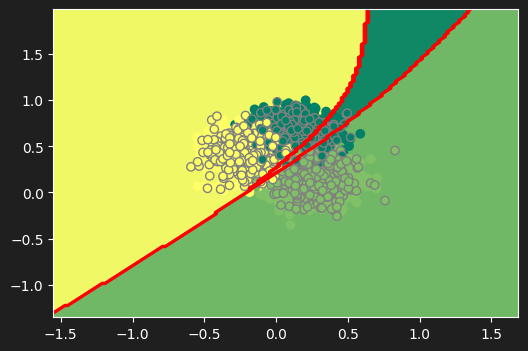

In [46]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
x2_min, x2_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
plt.figure(figsize=(6,4))

last_activation = list(parameters_f.keys())[-1]
Z = forward_propagation(np.c_[xx1.ravel(), xx2.ravel()].T, parameters_f)[f"A{int(last_activation[-1])}"]
# il faut réencoder Z pour passer de la taille (3 x 24024) à (1 x 24024) avec les valeurs de y
Z = Z.argmax(axis=0)

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap='summer')
plt.contour(xx1, xx2, Z, colors='red')
#ax.axis('off')
plt.scatter(X_train[0,:],X_train[1,:],c=y_train, cmap='summer')
plt.scatter(X_test[0,:],X_test[1,:],c=y_test, cmap='summer', edgecolors='gray')

print("train accuracy : ",scores["accuracy_train"][-1])
print("test accuracy : ",scores["accuracy_test"][-1])

plt.show()


## Let's try with the MNIST digits example (10 outputs)
### *Application avec la bibliothèque MNIST de chiffres manuscrits [0,9]*

In [47]:
from sklearn.datasets import load_digits # for MNIST data
from sklearn.model_selection import train_test_split
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
X_train.max()

16.0

In [50]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max()
X_train_reshape = X_train_reshape.T

X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()
X_test_reshape = X_test_reshape.T

# Convert the target variable to one-hot encoding
y_train_encoded = np.eye(10)[y_train].T
y_test_encoded = np.eye(10)[y_test].T


In [51]:
y_train_encoded.shape

(10, 1203)

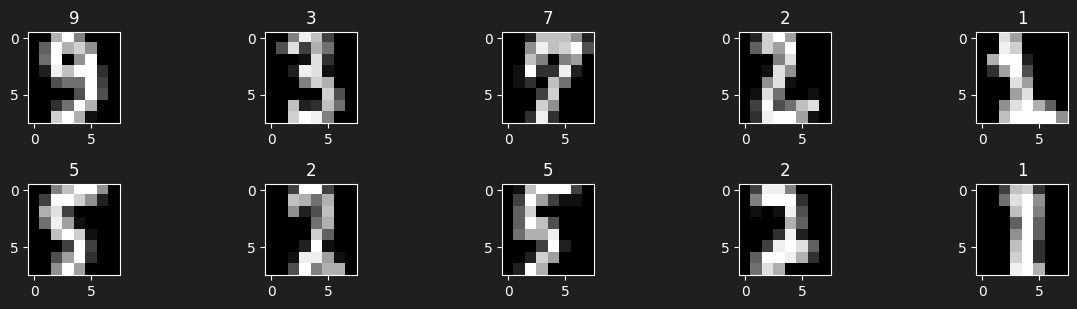

In [52]:
# visualization

X_train_viz = X_train.reshape(X_train.shape[0], 8, 8)
X_test_viz = X_test.reshape(X_test.shape[0], 8, 8)

plt.figure(figsize=(12,6))
for i in range(1,11):
    plt.subplot(4,5,i)
    #plt.imshow(X_train_viz[i], cmap='gray')
    plt.imshow(X_test_viz[i], cmap='gray')
    #plt.title(y_train.flatten()[i])
    plt.title(y_test.flatten()[i])
    plt.tight_layout()
plt.show()

100%|██████████| 1000/1000 [00:12<00:00, 78.73it/s]


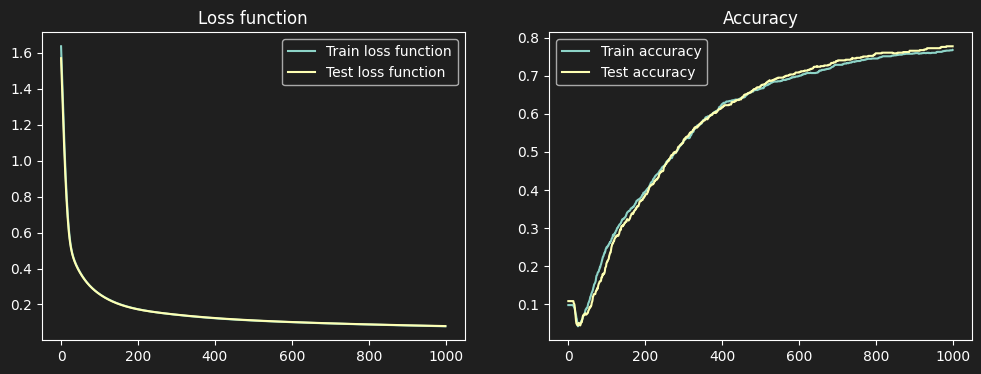

In [54]:
param_mnist, scores_mnist = neural_network(X_train_reshape, y_train_encoded, X_test_reshape, y_test_encoded, [128, 128,64], learning_rate=.01,n_epochs=1000,plot_scores=True)

In [56]:
scores_mnist["accuracy_train"][-1]

0.7680798004987531

In [98]:
nn = 32
hidden_layers = {
    "1": [nn], "2": [nn, nn],
    "3": [nn, nn, nn], "4": [nn, nn, nn, nn],
    "5": [nn, nn, nn, nn, nn], "6": [nn, nn, nn, nn, nn, nn], 
    "7": [nn, nn, nn, nn, nn, nn, nn], "8": [nn, nn, nn, nn, nn, nn, nn,nn]
                 }
all_scores = {}


for k,v in hidden_layers.items():
    _, scores_f = neural_network(X_train_reshape, y_train_encoded, X_test_reshape, y_test_encoded,
                                           v, learning_rate=.01,n_epochs=1000,plot_scores=False)
    all_scores[k] = scores_f

100%|██████████| 1000/1000 [00:10<00:00, 94.75it/s]


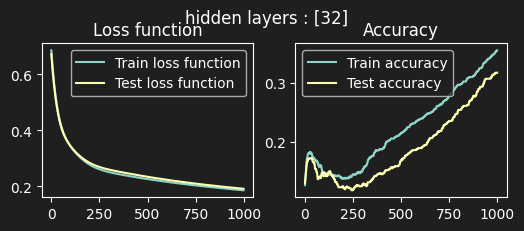

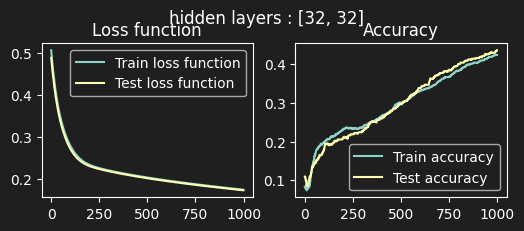

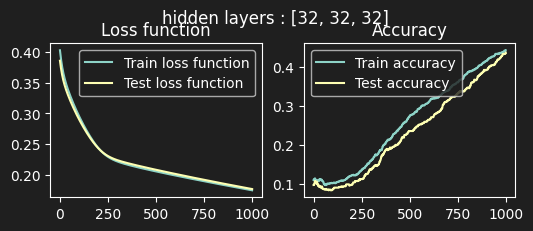

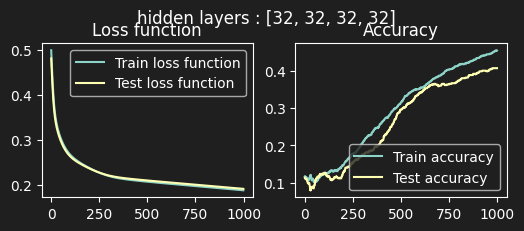

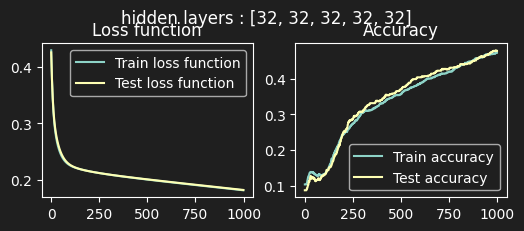

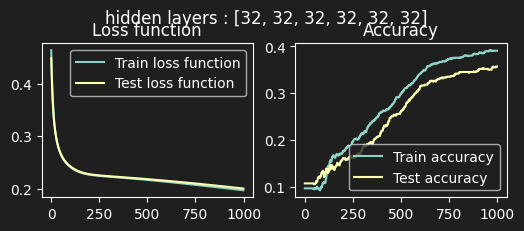

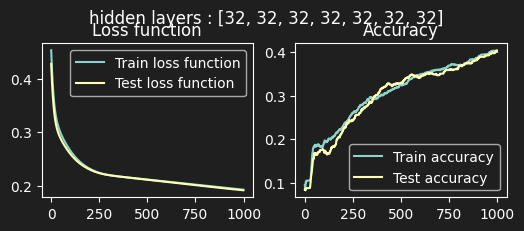

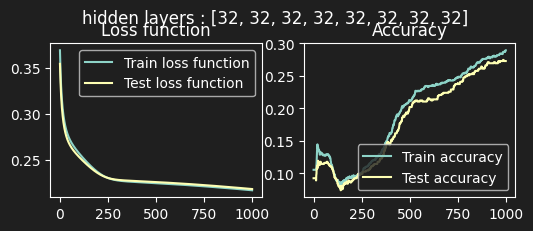

In [99]:
for i in range(1,len(hidden_layers)+1):
    plt.figure(figsize=(6,2))
    plt.subplot(1,2,1)
    plt.plot(range(len(all_scores[str(i)]["loss_train"])), all_scores[str(i)]["loss_train"], label="Train loss function")
    plt.plot(range(len(all_scores[str(i)]["loss_test"])), all_scores[str(i)]["loss_test"], label="Test loss function")
    plt.title("Loss function")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(all_scores[str(i)]["accuracy_train"])), all_scores[str(i)]["accuracy_train"], label="Train accuracy")
    plt.plot(range(len(all_scores[str(i)]["accuracy_test"])), all_scores[str(i)]["accuracy_test"], label="Test accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.suptitle(f"hidden layers : {hidden_layers[str(i)]}", y=1.05)
    plt.show()

In [100]:
max_accuracy_train = [v['accuracy_train'][-1] for _,v in all_scores.items()]
max_accuracy_test = [v['accuracy_test'][-1] for _,v in all_scores.items()]

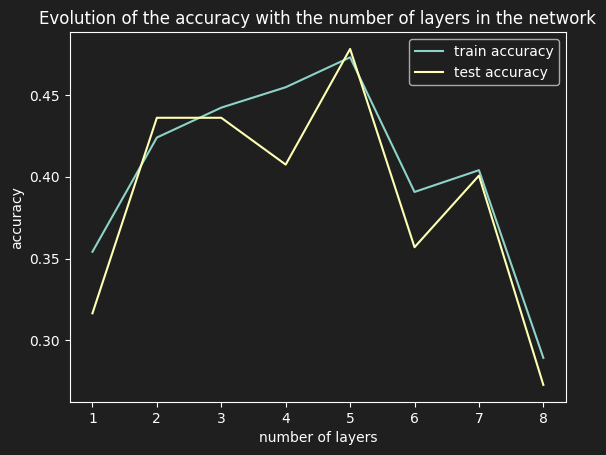

In [101]:
plt.plot(range(1,len(all_scores)+1),max_accuracy_train, label='train accuracy')
plt.plot(range(1,len(all_scores)+1),max_accuracy_test, label='test accuracy')
plt.xlabel("number of layers")
plt.ylabel("accuracy")
plt.legend()
plt.title("Evolution of the accuracy with the number of layers in the network")
plt.show()